In [1]:
import requests
import pandas as pd
import string

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
stopwords.words('english')[0:10]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/emails.csv')
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.columns

Index(['text', 'spam'], dtype='object')

In [0]:
df.drop_duplicates(inplace = True)

def process(text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc = " ".join(nopunc)

    stopw = [c for c in nopuch.split() if c.lower() not in stopwords.words('english')]

    return stopw


In [5]:
# Counter vectorization

from sklearn.feature_extraction.text import CountVectorizer

# analyzer = process_text
cv=CountVectorizer()
cv = cv.fit_transform(df['text'])
cv.shape

(5695, 37303)

In [6]:

x_train,  x_test, y_train, y_test = train_test_split(cv, df['spam'], test_size=0.20, random_state = 0)

from sklearn.naive_bayes import MultinomialNB  # just write MNB
classi = MultinomialNB()
classi.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
predi = classi.predict(x_test)

print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



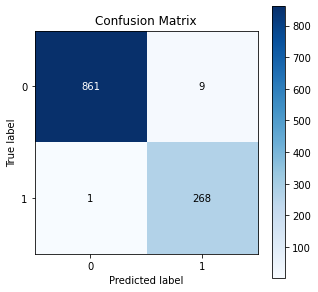

In [23]:
#! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, 
                                    predi,
                                    figsize=(5,5))


In [24]:
accuracy_score(y_test, predi)

0.9912203687445127